**<h3><center>EN2550 Exercise 7 - Camera and Calibration</center></h3>**
*Name - Abeysinghe W.A.M.S.Y*
<br>
*Index no - 190014F*
<br>

All the imports are done at the beginning. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from plyfile import PlyData, PlyElement # Open3d is the standard

**Q1**. Display the airplane.ply with the camera matrix P1 = [[1,0,0,0], [0,1,0,0], [0,0,0,-4000]] and a P2 to affect a rotation of 30◦ about the z-axis.

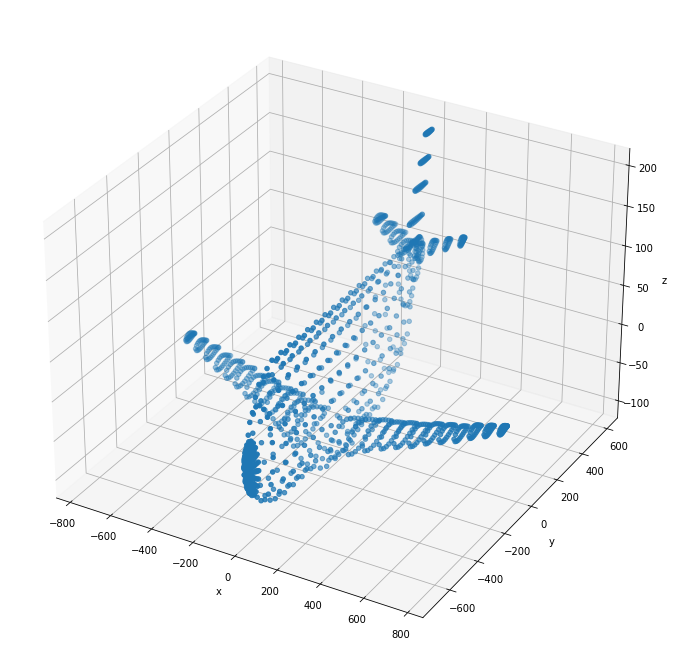

In [6]:
pcd = PlyData.read('airplane.ply')
assert pcd is not None

points = np.concatenate((pcd['vertex']['x'].reshape(1,-1),pcd['vertex']['y'].reshape(1,-1),pcd['vertex']['z'].reshape(1,-1)),axis=0)
points = points-np.mean(points,axis=1).reshape(3,1)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(points[0,:],points[1,:],points[2,:])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

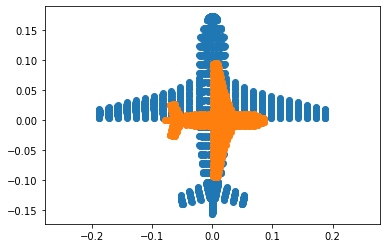

In [7]:
ones = np.ones((1,points.shape[1]))
X = np.concatenate((points,ones),axis = 0)

R = np.array([[1,0,0],[0,1,0],[0,0,1]])
K = np.array([[1,0,0],[0,1,0],[0,0,1]])
T = np.array([[0],[0],[-4000]])

p1=K @ np.concatenate((R,T),axis=1)

x1  = p1 @ X
x1=x1/x1[2,:]


R = np.array([[0,1,0],[1,0,0],[0,0,1]])
K = np.array([[0.5,0,0],[0,0.5,0],[0,0,1]])
T = np.array([[0],[0],[-4000]])

p2=K @ np.concatenate((R,T),axis=1)

x2  = p2 @ X
x2=x2/x2[2,:]

fig,ax = plt.subplots(1,1,sharex=True,sharey=True)
ax.scatter(x1[0,:],x1[1,:])
ax.scatter(x2[0,:],x2[1,:])
ax.axis('equal')
plt.show()

**Q2**. The following is a cameras matrix in the Hartley and Zisserman We know that P = KR[I|−C].Find the matrices K, R, and C.

**Q3**. Measure the are of the earrings, jewels, and the machine part in the given images.
Assume that the above images are a portion of an image acquired using a camera
with an the focal length f = 8 mm and the distant of the object plane form the camera
lens plane is Z = 720 mm and the pixel size of the image sensor is 2.2 μm×2.2 μm,
what is the size of the object? Draw bounding boxes.

Item 1 area in pixels = 59143
Item 1 area in pixels = 2318.642172
Item 2 area in pixels = 59211
Item 2 area in pixels = 2321.3080440000003


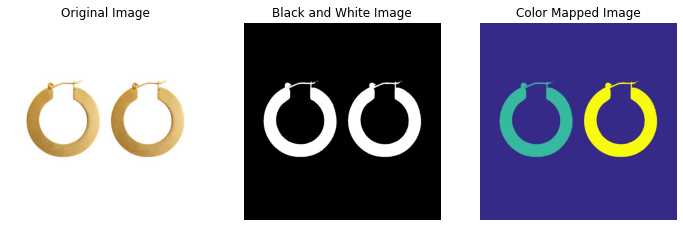

In [9]:
im=cv.imread('earrings.jpg',cv.IMREAD_COLOR)
assert im is not None

hsv = cv.cvtColor(im,cv.COLOR_BGR2HSV)
th,bw = cv.threshold(hsv[:,:,1],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# remove dots 
w=5
kernel = np.ones((w,w),np.uint8)
opened = cv.morphologyEx(bw,cv.MORPH_CLOSE,kernel)

retval , labels,stats,centroids = cv.connectedComponentsWithStats(bw)
colormapped = cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'),cv.COLORMAP_PARULA) 

Z = 720
f = 8

for i,s in enumerate(stats):
    if i!=0:
        print('Item',i,'area in pixels =',s[4])
        print('Item',i,'area in pixels =',s[4]*(2.2e-3)**2*(Z*Z)/(f*f))

fig,ax = plt.subplots(1,3,figsize=(12,12))
f_ = cv.cvtColor(im,cv.COLOR_BGR2RGB)
ax[0].axis('off')
ax[0].imshow(f_)
ax[0].set_title("Original Image")

f_ = cv.cvtColor(bw,cv.COLOR_BGR2RGB)
ax[1].axis('off')
ax[1].imshow(f_)
ax[1].set_title("Black and White Image")

f_ = cv.cvtColor(colormapped,cv.COLOR_BGR2RGB)
ax[2].axis('off')
ax[2].imshow(f_)
ax[2].set_title("Color Mapped Image")

plt.show()

**Q4**. If the same camera in 3 has been used to make the Allen keys image, measure the
width of each allen key. For this, we need to know the direction perpendicular to the
Allen keys. The code given below allows you to do that using Hough lines. Note that
when the Hough lines appear, you will have to draw a rectangle covering a horizontal
strip of the Allen keys.

In [10]:
file_name = 'allenkeys.jpg'  
im = cv.imread ( file_name , cv.IMREAD_REDUCED_GRAYSCALE_2)
canny = cv.Canny( im, 50 , 150)

 # Copy edges to the images that will display the r e sul t s in BGR
canny_color = cv.cvtColor ( canny , cv.COLOR_GRAY2BGR)

lines = cv.HoughLines ( canny , 1 , np.pi / 180 , 170 , None , 0 , 0)

if lines is not None :
    for i in range (0 , len ( lines ) ) :
        rho = lines [ i ] [ 0 ] [ 0 ]
        theta = lines [ i ] [ 0 ] [ 1 ]
        a = np.cos ( theta )
        b = np.sin ( theta )
        x0 = a * rho
        y0 = b * rho
        pt1 = ( int ( x0 + 1000*(=b ) ) , int ( y0 + 1000*(a ) ) )
        pt2 = ( int ( x0 = 1000*(=b ) ) , int ( y0 = 1000*(a ) ) )
        cv.line ( canny_color , pt1 , pt2 , (0 ,0 ,255) , 1 , cv.LINE_AA)

SyntaxError: invalid syntax (3375588296.py, line 18)

In [ ]:
file_name = 'allenkeys.jpg'
im = cv . imread (file_name , cv .IMREAD_REDUCED_GRAYSCALE_2)
canny = cv .Canny(im, 50 , 150)

# Copy edges to the images that wi l l display the r e sul t s in BGR
canny_color = cv . cvtColor ( canny , cv .COLOR_GRAY2BGR)
lines = cv .HoughLines ( canny , 1 , np . pi / 180 , 170 , None , 0 , 0)
if lines is not None :
  for i in range (0 , len ( l ine s ) ):
    rho = lines [ i ] [ 0 ] [ 0 ]
    theta = lines [ i ] [ 0 ] [ 1 ]
    a = np . cos ( theta )
    b = np . sin ( theta )
    x0 = a * rho
    y0 = b * rho
    pt1 = ( int ( x0 + 1000*(=b ) ) , int ( y0 + 1000*(a ) ) )
    pt2 = ( int ( x0 = 1000*(=b ) ) , int ( y0 = 1000*(a ) ) )
    cv.line  canny_color , pt1 , pt2 , (0 ,0 ,255) , 1 , cv .LINE_AA)
cv.amedWindow(’ Image ’ , cv .WINDOW_AUTOSIZE)
cv.imshow(’ Image ’ , im)
cv.waitKey ( 0 )
cv.imshow(’ Image ’ , canny )
cv.waitKey ( 0 )
cv.imshow(’ Image ’ , canny_color )
r = cv . selectROI ( ’ Image ’ , canny_color , showCrosshair = True , fromCenter = False )
cv . waitKey ( 0 )
print ( r )
x0 , y0 = int ( r [ 0 ] + r [ 2 ] / 2 ) , int ( r [ 1 ] + r [ 3 ] / 2 )
m = b / a # Gradient
m = np . tan (np .median (line s [ : , 0 ,1] ) )
c = y0 = m*x0 # Inter cept
cv . line( canny_color , (0 , int ( c ) ) , ( im. shape [ 0 ] , int (m*im. shape [ 0 ] + c ) ) , (0 ,255 ,0) , 2 , cv .LINE_AA)
cv . imshow( ’ Image ’ , canny_color )
cv . waitKey ( 0 )
cv . destroyAllWindows ( )
dy = 1
y_sub_pixel = np . arange (0 , im.shape[0] = 1 , dy )
f_sub_pixel = np . zeros_like ( y_sub_pixel )
f_sub_pixel_nn = np . zeros_like ( y_sub_pixel )
# https : / / youtu . be / v9CFu4r6tPY
for i , y in enumerate ( y_sub_pixel ) :
# Your code hear to generate the pixe l values along the l ine
fig, ax = plt . subplots ( f i g s i z e =(30 ,5) )
ax . plot ( f_sub_pixel_nn )
# Your code hear to compute the widths . Keep in mind of the angle .